In [7]:
import time
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')
import unitymouse.render as umr

In [2]:
umr.setup(localhost = True, standalone = True)

UnityMouse Renderer connected to server
Login sent with ID: Dan


In [2]:
# Convert the TIFF files into numpy arrays
import SimpleITK as sitk

In [45]:
reader = sitk.ImageFileReader()
reader.SetImageIO("TIFFImageIO")
reader.SetFileName(str('./data/steven/STD_ds_NR_0020_GR.tif'))
img = reader.Execute()

new_img = sitk.PermuteAxes(img, [2, 1, 0])
new_img = sitk.Flip(new_img, [True, False, False])
new_img.SetSpacing([1, 1, 1])
writer = sitk.ImageFileWriter()
writer.SetImageIO("NrrdImageIO")
writer.SetFileName(str('./data/steven/STD_ds_NR_0020_GR.nrrd'))
writer.Execute(new_img)

In [4]:
import nrrd

# Load files are convert to a single volume
We want the track data to be in the red channel and the regular data to be in green

In [126]:
data_gr, meta = nrrd.read('./data/steven/STD_ds_NR_0020_GR.nrrd')
data_rd, meta = nrrd.read('./data/steven/STD_ds_NR_0020_RD.nrrd')

In [127]:
# define a function that will squish values into a smaller range of 100 values? save on data size
def quantizeImg(img):
    qs = np.quantile(img,np.linspace,0,1,11)
    img = img / qs[-1]

In [133]:
np.quantile(data_gr,np.linspace(0,1,21))

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 1.0000e+01, 1.3000e+01, 1.4000e+01, 1.6000e+01,
       1.8000e+01, 2.1000e+01, 1.4700e+02, 2.4700e+02, 3.0700e+02,
       3.6400e+02, 4.2300e+02, 4.8900e+02, 5.7100e+02, 6.9200e+02,
       1.9938e+04])

In [129]:
np.quantile(data_rd,np.linspace(0,1,11))

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 4.0000e+00, 8.0000e+00,
       1.1000e+01, 8.5000e+01, 1.8700e+02, 2.6200e+02, 3.5600e+02,
       1.6537e+04])

In [214]:
data_gr_norm = data_gr / 1500 * 255
data_rd_norm = np.power(data_rd,1.3)
data_rd_norm[data_rd_norm<5000] = 0
data_rd_norm = data_rd_norm / 10000 * 255

In [215]:
data = np.empty((528,320,456,4),dtype=np.uint8)
data[:,:,:,3] = 255
data[:,:,:,1] = data_gr_norm
data[:,:,:,0] = data_rd_norm

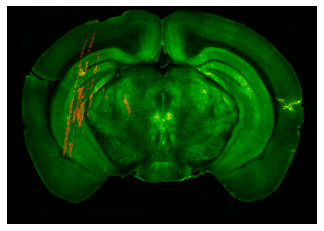

In [216]:
plt.axis('off')
plt.imshow(data[323,:,:,:])

(array([671., 216., 104.,  41.,  29.,   7.,   5.,   2.,   4.,   2.]),
 array([1000.64182783, 1677.77967232, 2354.91751682, 3032.05536131,
        3709.1932058 , 4386.33105029, 5063.46889478, 5740.60673927,
        6417.74458376, 7094.88242825, 7772.02027275]),
 <BarContainer object of 10 artists>)

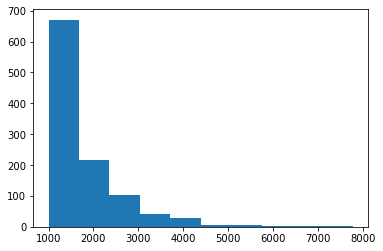

In [193]:
plt.hist(data_rd_norm[data_rd_norm>1000].flatten())

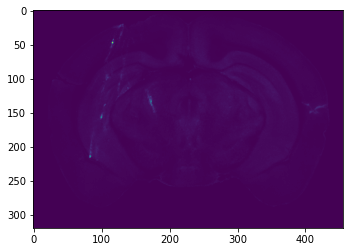

In [173]:
plt.imshow(np.power(data_rd[321,:,:],1.3))

# Send volume data to unity

In [ ]:
umr.clear()
umr.create_volume("histology")
umr.set_volume_colormap(["histology", "#000000", "#FFFF00", "#00FF00"])
umr.set_volume_data("histology", coverage.copy())
umr.set_volume_visibility("histology",True)